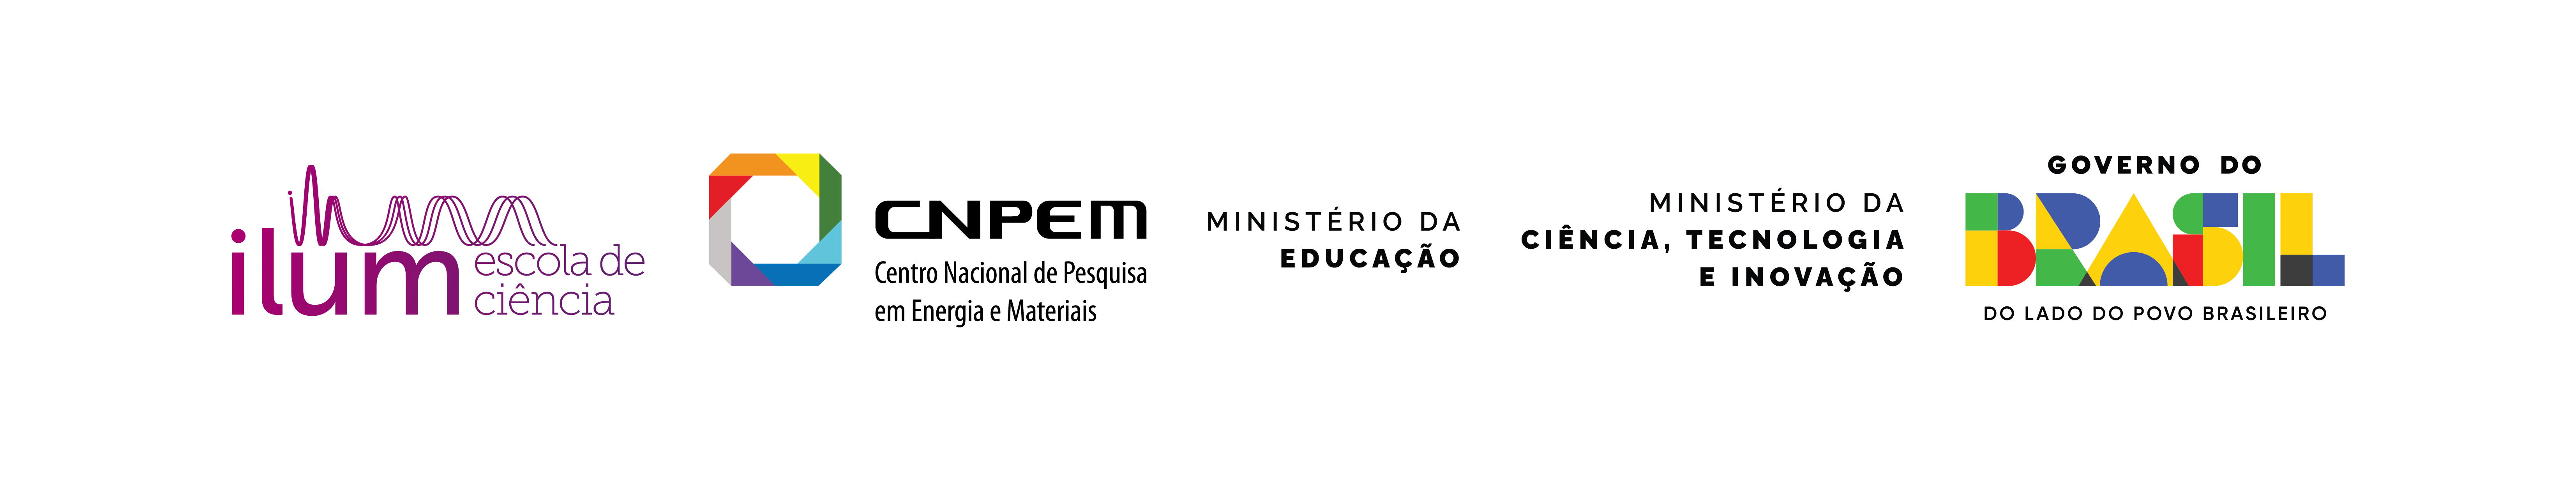

<div style="text-align: center;">

# Topologia de Polímeros
</div>

<br>
<div style="text-align: center;">
Ana Luz Pereira Mendes; Emanuel Piveta Pozzobon; Maria Clara Macedo Lelis; Pedro Coelho Gimenes de Freitas
</div>

<div style="text-align: center;">
    <i>Ilum: School Of Science, Brazilian Center for Research in Energy and Materials (CNPEM)</i>
</div>

<br>

____________

<div style="text-align: justify;"> <b>Objetivo:</b> A proposta será utilizar o ensemble canônico para, através de uma rede fixa, gerar uma quantidade N de polímeros. Com isso, sortear um dos polímeros da rede e redefinir a sua posição a partir da escolha de um novo ponto inicial, que gerará uma nova configuração por meio do algoritmo do andar do bêbado. Com esse novo estado estabelecido, calcularemos a energia do sistema, analisando sítios de interações e, assim, encontrar o equilíbrio.</div>

### Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def gerar_polimero(
    rede: np.ndarray,
    tamanho_polimero: int,
    id_polimero: int,
    MAX_TENTATIVAS: int = 10_000
) -> list[tuple[int, int]] | None:

    altura, largura = rede.shape

    # Lista atualizada de posições livres
    posicoes_livres = list(zip(*np.where(rede == 0)))
    
    # verificar caso a rede não tenha nenhum espaço com 0
    if len(posicoes_livres) == 0:
        return None   # Rede cheia

    for _ in range(MAX_TENTATIVAS):

        # Escolhe aleatoriamente entre posições disponíveis
        y_inicial, x_inicial = random.choice(posicoes_livres)

        polimero = [(x_inicial, y_inicial)]
        rede[y_inicial, x_inicial] = id_polimero
        pos_atual = (x_inicial, y_inicial)

        for _ in range(1, tamanho_polimero):
            vizinhos_possiveis = [
                (pos_atual[0] + 1, pos_atual[1]),
                (pos_atual[0] - 1, pos_atual[1]),
                (pos_atual[0], pos_atual[1] + 1),
                (pos_atual[0], pos_atual[1] - 1),
            ]

            random.shuffle(vizinhos_possiveis)

            passo_valido = False
            for prox_x, prox_y in vizinhos_possiveis:
                if (
                    0 <= prox_x < largura
                    and 0 <= prox_y < altura
                    and rede[prox_y, prox_x] == 0
                ):
                    pos_atual = (prox_x, prox_y)
                    polimero.append(pos_atual)
                    rede[prox_y, prox_x] = id_polimero
                    passo_valido = True
                    break

            if not passo_valido:
                # desfaz
                for px, py in polimero:
                    rede[py, px] = 0
                break  # tenta de novo outro ponto inicial

        else:
            return polimero  # Conseguiu gerar!

    return None  # Depois de muitas tentativas, desista.

In [3]:
def criar_rede(TAMANHO_REDE_X, TAMANHO_REDE_Y, NUMERO_DE_POLIMEROS, TAMANHO_DO_POLIMERO, MAX_TENTATIVAS):

    for i in range(MAX_TENTATIVAS):
        rede = np.zeros((TAMANHO_REDE_Y, TAMANHO_REDE_X))
        polimeros = {}

        id_atual = 1

        while id_atual <= NUMERO_DE_POLIMEROS:

            coords = gerar_polimero(rede, TAMANHO_DO_POLIMERO, id_atual, MAX_TENTATIVAS)

            if coords is None:
                break

            polimeros[id_atual] = coords
            id_atual += 1
        
        if id_atual > NUMERO_DE_POLIMEROS:
            return rede, polimeros

    raise RuntimeError("Não foi possível gerar uma rede completa após muitas tentativas.")

#### Exemplo `criar_redes:` 

É importante perceber quanod temos redes muito grandes como a maior parte dos itens usados, demorará muito para rodar uma única aplicação dessa função.

In [4]:
rede, polimeros_gerados = criar_rede(TAMANHO_REDE_X=15, 
                                     TAMANHO_REDE_Y=15, 
                                     NUMERO_DE_POLIMEROS=20, 
                                     TAMANHO_DO_POLIMERO=10, 
                                     MAX_TENTATIVAS=10_000)
# Número de espaços na rede: 225
# Número de espaços da rede usados: 200
print(rede)
print("-=-"*30)
print(polimeros_gerados)


[[ 0.  0. 10. 10. 10. 17. 13. 13.  9.  9.  0.  2.  2.  2.  2.]
 [ 0.  0. 10. 10. 10. 17. 13. 13. 13.  9.  2.  2. 15. 15.  2.]
 [14. 14. 17. 10. 10. 17. 13. 13. 13.  9.  9.  9. 15.  2.  2.]
 [14. 14. 17. 10. 10. 17. 13. 13.  0.  0.  0.  9. 15.  2.  0.]
 [14. 14. 17. 17. 17. 17.  7.  7.  7.  0.  0.  9. 15. 15. 15.]
 [14. 14. 16.  0.  7.  7.  7.  7.  7.  6.  6.  9.  9. 15. 15.]
 [14. 14. 16. 16.  7.  7. 19. 19. 19.  6.  6.  6.  6. 15. 20.]
 [16. 16. 16. 16.  4.  4.  4. 19. 19.  6. 20. 20. 20. 20. 20.]
 [16. 16. 16.  4.  4.  4.  4. 19.  6.  6.  3.  3.  3. 20. 20.]
 [ 0.  4.  4.  4. 19. 19. 19. 19.  6.  5.  3.  0.  0. 20. 20.]
 [ 8.  8.  8.  0. 11. 12. 12.  5.  0.  5.  3.  3.  3.  3.  0.]
 [ 8.  8. 11. 11. 11. 12. 12.  5.  5.  5.  5.  3.  3.  1.  1.]
 [ 8.  8. 11. 11. 11. 12.  0.  0.  5.  5.  5.  1.  1.  1.  1.]
 [ 8.  8. 11. 11. 11. 12. 12. 12. 18. 18. 18. 18. 18.  1.  1.]
 [ 0.  8.  0.  0.  0.  0. 12. 12. 18. 18. 18. 18. 18.  1.  1.]]
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-

In [5]:
def plotar_rede(rede: list[list], polimeros_coords: dict[int, list[tuple[int, int]]]):
    """
    Plota uma matriz representando a rede e os polímeros sobre ela.

    Args:
        rede (list[list]): matriz bidimensional representando a rede.
        polimeros_coords (dict[int, list[tuple[int, int]]]): 
            dicionário onde as chaves são IDs dos polímeros
            e os valores são listas de coordenadas (x, y).
    """
    
    plt.figure(figsize=(10, 10), dpi=180)
    plt.imshow(rede, origin="lower", cmap="gist_ncar_r", interpolation="nearest")

    for id_polimero, coords in polimeros_coords.items():
        if coords:
            x_coords = [c[0] for c in coords]
            y_coords = [c[1] for c in coords]
            plt.plot(
                x_coords, y_coords, "-o", markersize=3, label=f"Polímero {id_polimero}"
            )

    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(False)
    plt.show()

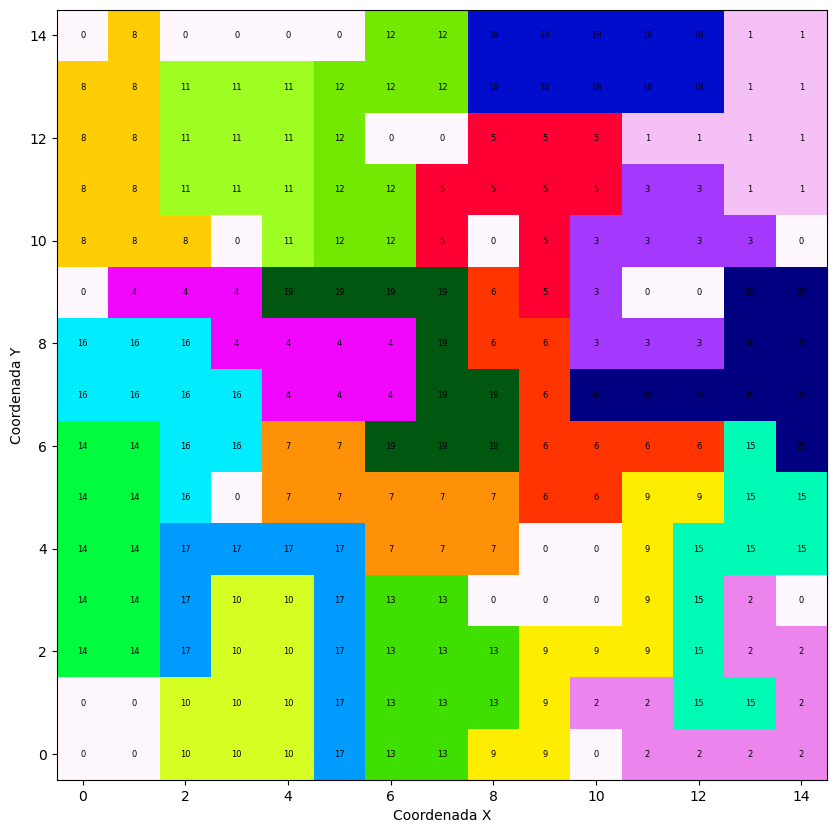

In [6]:
def plotar_rede_numeros(rede: list[list]):
    # plotar rede mostrando números
    plt.figure(figsize=(10, 10))
    # plota a figura da matriz
    plt.imshow(rede, origin="lower", cmap="gist_ncar_r", interpolation="nearest")
    for (x, y), valor in np.ndenumerate(rede):
        # printa os números diferentes de zero
        if valor != 0:
            plt.text(y, x, int(valor), ha="center", va="center", color="black", fontsize=6)
            
        # printa os zeros
        else:
            plt.text(y,x, int(valor), ha="center", va="center", color="black", fontsize=6)
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(False)
    plt.show()
    
plotar_rede_numeros(rede)

A rede é a seguir:

In [7]:
print(rede)
print(rede.shape)

[[ 0.  0. 10. 10. 10. 17. 13. 13.  9.  9.  0.  2.  2.  2.  2.]
 [ 0.  0. 10. 10. 10. 17. 13. 13. 13.  9.  2.  2. 15. 15.  2.]
 [14. 14. 17. 10. 10. 17. 13. 13. 13.  9.  9.  9. 15.  2.  2.]
 [14. 14. 17. 10. 10. 17. 13. 13.  0.  0.  0.  9. 15.  2.  0.]
 [14. 14. 17. 17. 17. 17.  7.  7.  7.  0.  0.  9. 15. 15. 15.]
 [14. 14. 16.  0.  7.  7.  7.  7.  7.  6.  6.  9.  9. 15. 15.]
 [14. 14. 16. 16.  7.  7. 19. 19. 19.  6.  6.  6.  6. 15. 20.]
 [16. 16. 16. 16.  4.  4.  4. 19. 19.  6. 20. 20. 20. 20. 20.]
 [16. 16. 16.  4.  4.  4.  4. 19.  6.  6.  3.  3.  3. 20. 20.]
 [ 0.  4.  4.  4. 19. 19. 19. 19.  6.  5.  3.  0.  0. 20. 20.]
 [ 8.  8.  8.  0. 11. 12. 12.  5.  0.  5.  3.  3.  3.  3.  0.]
 [ 8.  8. 11. 11. 11. 12. 12.  5.  5.  5.  5.  3.  3.  1.  1.]
 [ 8.  8. 11. 11. 11. 12.  0.  0.  5.  5.  5.  1.  1.  1.  1.]
 [ 8.  8. 11. 11. 11. 12. 12. 12. 18. 18. 18. 18. 18.  1.  1.]
 [ 0.  8.  0.  0.  0.  0. 12. 12. 18. 18. 18. 18. 18.  1.  1.]]
(15, 15)


Lembre-se que as posições aqui estão em (x, y) ou (coluna, linha)

In [8]:
for chave, valor in polimeros_gerados.items():
    print(f'Polímero {chave}: {valor}')
    

Polímero 1: [(13, 11), (14, 11), (14, 12), (14, 13), (14, 14), (13, 14), (13, 13), (13, 12), (12, 12), (11, 12)]
Polímero 2: [(13, 3), (13, 2), (14, 2), (14, 1), (14, 0), (13, 0), (12, 0), (11, 0), (11, 1), (10, 1)]
Polímero 3: [(13, 10), (12, 10), (12, 11), (11, 11), (11, 10), (10, 10), (10, 9), (10, 8), (11, 8), (12, 8)]
Polímero 4: [(1, 9), (2, 9), (3, 9), (3, 8), (4, 8), (4, 7), (5, 7), (6, 7), (6, 8), (5, 8)]
Polímero 5: [(7, 10), (7, 11), (8, 11), (8, 12), (9, 12), (10, 12), (10, 11), (9, 11), (9, 10), (9, 9)]
Polímero 6: [(12, 6), (11, 6), (10, 6), (10, 5), (9, 5), (9, 6), (9, 7), (9, 8), (8, 8), (8, 9)]
Polímero 7: [(5, 6), (4, 6), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (8, 4), (7, 4), (6, 4)]
Polímero 8: [(2, 10), (1, 10), (0, 10), (0, 11), (1, 11), (1, 12), (0, 12), (0, 13), (1, 13), (1, 14)]
Polímero 9: [(12, 5), (11, 5), (11, 4), (11, 3), (11, 2), (10, 2), (9, 2), (9, 1), (9, 0), (8, 0)]
Polímero 10: [(4, 1), (4, 0), (3, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), 

Aqui já está em (linha, coluna)

In [9]:
rede[3][4]

10.0

Vamos criar uma matriz de zeros

In [10]:
D = np.zeros((3,3))
print(D)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [11]:
# np.pad adiciona bordas a matriz, bordas iguais a zero
rede_pad = np.pad(rede, pad_width=1, mode='constant', constant_values=0)
print(rede_pad)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10. 10. 10. 17. 13. 13.  9.  9.  0.  2.  2.  2.  2.  0.]
 [ 0.  0.  0. 10. 10. 10. 17. 13. 13. 13.  9.  2.  2. 15. 15.  2.  0.]
 [ 0. 14. 14. 17. 10. 10. 17. 13. 13. 13.  9.  9.  9. 15.  2.  2.  0.]
 [ 0. 14. 14. 17. 10. 10. 17. 13. 13.  0.  0.  0.  9. 15.  2.  0.  0.]
 [ 0. 14. 14. 17. 17. 17. 17.  7.  7.  7.  0.  0.  9. 15. 15. 15.  0.]
 [ 0. 14. 14. 16.  0.  7.  7.  7.  7.  7.  6.  6.  9.  9. 15. 15.  0.]
 [ 0. 14. 14. 16. 16.  7.  7. 19. 19. 19.  6.  6.  6.  6. 15. 20.  0.]
 [ 0. 16. 16. 16. 16.  4.  4.  4. 19. 19.  6. 20. 20. 20. 20. 20.  0.]
 [ 0. 16. 16. 16.  4.  4.  4.  4. 19.  6.  6.  3.  3.  3. 20. 20.  0.]
 [ 0.  0.  4.  4.  4. 19. 19. 19. 19.  6.  5.  3.  0.  0. 20. 20.  0.]
 [ 0.  8.  8.  8.  0. 11. 12. 12.  5.  0.  5.  3.  3.  3.  3.  0.  0.]
 [ 0.  8.  8. 11. 11. 11. 12. 12.  5.  5.  5.  5.  3.  3.  1.  1.  0.]
 [ 0.  8.  8. 11. 11. 11. 12.  0.  0.  5.  5.  5.  1.  1.  1.  1.  0.]
 [ 0. 

### Vamos printar kerneis que representem a vizinhança de cada átomo do polímero

In [12]:
for chave, valor in polimeros_gerados.items():
    for v in valor:
        print(v)
        x, y = v 
        campo = rede_pad[y:y+3, x:x+3]
        print(f"Polímero {chave} na posição {v} tem vizinhança:\n{campo}\n")

(13, 11)
Polímero 1 na posição (13, 11) tem vizinhança:
[[3. 3. 0.]
 [3. 1. 1.]
 [1. 1. 1.]]

(14, 11)
Polímero 1 na posição (14, 11) tem vizinhança:
[[3. 0. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]

(14, 12)
Polímero 1 na posição (14, 12) tem vizinhança:
[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]

(14, 13)
Polímero 1 na posição (14, 13) tem vizinhança:
[[1. 1. 0.]
 [1. 1. 0.]
 [1. 1. 0.]]

(14, 14)
Polímero 1 na posição (14, 14) tem vizinhança:
[[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]

(13, 14)
Polímero 1 na posição (13, 14) tem vizinhança:
[[18.  1.  1.]
 [18.  1.  1.]
 [ 0.  0.  0.]]

(13, 13)
Polímero 1 na posição (13, 13) tem vizinhança:
[[ 1.  1.  1.]
 [18.  1.  1.]
 [18.  1.  1.]]

(13, 12)
Polímero 1 na posição (13, 12) tem vizinhança:
[[ 3.  1.  1.]
 [ 1.  1.  1.]
 [18.  1.  1.]]

(12, 12)
Polímero 1 na posição (12, 12) tem vizinhança:
[[ 3.  3.  1.]
 [ 1.  1.  1.]
 [18. 18.  1.]]

(11, 12)
Polímero 1 na posição (11, 12) tem vizinhança:
[[ 5.  3.  3.]
 [ 5.  1.  1.]
 [18. 18. 18.]]

(13, 3)
Polímer

Vizinhos da diagonal de um número no centro de uma matriz 3x3

In [13]:
campo = np.array([
    [9, 4, 7],
    [2, 1, 3],
    [8, 6, 5]])
print(campo)
print(campo[(0,2)])

vizinhos_possiveis_diagonal = [campo[(0,0)],campo[(0,2)],campo[(2,0)],campo[(2,2)]]
print(vizinhos_possiveis_diagonal)

[[9 4 7]
 [2 1 3]
 [8 6 5]]
7
[9, 7, 8, 5]


In [14]:
def calcula_energia_sistema(rede: list[list], polimeros_gerados: dict[int, list[list]], EAl=1, EAd=1, EBl=1, EBd=1):
    """_Função que calcula a energia de uma rede_

    Args:
        rede (list[list]): unidade de rede
        polimeros_gerados (dict[int, list[list]]): polímeros da rede
        EAl (int, optional): Defaults to 1.
        EAd (int, optional): Defaults to 1.
        EBl (int, optional): Defaults to 1.
        EBd (int, optional): Defaults to 1.

    Returns:
        list[]: uma lista de 4 itens respectivamente: dicionario, rede, Energia_total, lista_energia
    """

    Energia_total = 0

    dicionario = dict()
    lista_energia = []
    for chave, valor in polimeros_gerados.items():
        i = 0 
        passo = 0
        dicionario[chave] = {'frontais': 0, 
                            'diagonais': 0,
                            'diferentes frontais': 0,
                            'diferentes diagonais': 0,}
        energia_iteracao = 0 
        for v in valor:
            # cria uma cópia
            rede_copia = np.copy(rede)
            y, x = v 

            # zera o ponto na matriz onde vc está
            rede_copia[v[1], v[0]] = 0
            
            if passo != 0: 
                ant = valor[passo-1]
                # Zera o anterior
                rede_copia[ant[1], ant[0]] = 0
                
            if passo != len(valor)-1:
                prox = valor[passo+1]
                # Zera o próximo
                rede_copia[prox[1], prox[0]] = 0
            
            passo += 1

            # Cria rede pad
            rede_pad = np.pad(rede_copia, pad_width=1, mode='constant', constant_values=0)
            # Cria Karnel
            campo = rede_pad[x:x+3, y:y+3]

            rede_pad2 = np.pad(rede, pad_width=1, mode='constant', constant_values=0)
            campo2 = rede_pad2[x:x+3, y:y+3]
            
            #Calcular energia das interações laterais
            vizinhos_possiveis_laterais = [(0,1),(1,0),(1,2),(2,1)]
            
            for coord in vizinhos_possiveis_laterais:
                campo_valor = campo[coord]
                
                if campo_valor == 0:
                    Energia_total += 0
                    energia_iteracao += 0 
                
                elif campo_valor == chave:
                    Energia_total += EAl
                    energia_iteracao += EAl
                    dicionario[chave]['frontais'] += 1
                
                else:
                    Energia_total += EBl
                    energia_iteracao += EBl
                    dicionario[chave]['diferentes frontais'] += 1
                    
            #Calcular energia das interações diagonais
            vizinhos_possiveis_diagonais = [(0,0),(0,2),(2,0),(2,2)]
            
            for coord_d in vizinhos_possiveis_diagonais:
                campo_valor = campo[coord_d]

                if campo_valor == 0:
                    Energia_total += 0
                    energia_iteracao += 0
                
                elif campo_valor == chave:
                    Energia_total += EAd
                    energia_iteracao += EAd
                    dicionario[chave]['diagonais'] += 1

                else:
                    Energia_total += EBd
                    energia_iteracao += EBd
                    dicionario[chave]['diferentes diagonais'] += 1

        dicionario[chave]['frontais'] /= 2
        dicionario[chave]['diagonais'] /= 2
        lista_energia.append(energia_iteracao/2)
        
    Energia_total = Energia_total/2

    return dicionario, rede, Energia_total, lista_energia
    
teste = calcula_energia_sistema(rede, polimeros_gerados)
print(f"dicionário: {teste[0]}")
print(f"rede:\n{teste[1]}")
print(f"Energia total: {teste[2]}")
print(f"Lista de energia: {teste[3]}")

dicionário: {1: {'frontais': 3.0, 'diagonais': 8.0, 'diferentes frontais': 9, 'diferentes diagonais': 12}, 2: {'frontais': 0.0, 'diagonais': 5.0, 'diferentes frontais': 11, 'diferentes diagonais': 15}, 3: {'frontais': 1.0, 'diagonais': 6.0, 'diferentes frontais': 14, 'diferentes diagonais': 21}, 4: {'frontais': 2.0, 'diagonais': 7.0, 'diferentes frontais': 16, 'diferentes diagonais': 25}, 5: {'frontais': 2.0, 'diagonais': 8.0, 'diferentes frontais': 13, 'diferentes diagonais': 19}, 6: {'frontais': 1.0, 'diagonais': 6.0, 'diferentes frontais': 17, 'diferentes diagonais': 26}, 7: {'frontais': 3.0, 'diagonais': 8.0, 'diferentes frontais': 13, 'diferentes diagonais': 20}, 8: {'frontais': 3.0, 'diagonais': 8.0, 'diferentes frontais': 6, 'diferentes diagonais': 11}, 9: {'frontais': 0.0, 'diagonais': 4.0, 'diferentes frontais': 15, 'diferentes diagonais': 20}, 10: {'frontais': 4.0, 'diagonais': 9.0, 'diferentes frontais': 9, 'diferentes diagonais': 14}, 11: {'frontais': 4.0, 'diagonais': 9.0,

------------

In [15]:
print(rede)

[[ 0.  0. 10. 10. 10. 17. 13. 13.  9.  9.  0.  2.  2.  2.  2.]
 [ 0.  0. 10. 10. 10. 17. 13. 13. 13.  9.  2.  2. 15. 15.  2.]
 [14. 14. 17. 10. 10. 17. 13. 13. 13.  9.  9.  9. 15.  2.  2.]
 [14. 14. 17. 10. 10. 17. 13. 13.  0.  0.  0.  9. 15.  2.  0.]
 [14. 14. 17. 17. 17. 17.  7.  7.  7.  0.  0.  9. 15. 15. 15.]
 [14. 14. 16.  0.  7.  7.  7.  7.  7.  6.  6.  9.  9. 15. 15.]
 [14. 14. 16. 16.  7.  7. 19. 19. 19.  6.  6.  6.  6. 15. 20.]
 [16. 16. 16. 16.  4.  4.  4. 19. 19.  6. 20. 20. 20. 20. 20.]
 [16. 16. 16.  4.  4.  4.  4. 19.  6.  6.  3.  3.  3. 20. 20.]
 [ 0.  4.  4.  4. 19. 19. 19. 19.  6.  5.  3.  0.  0. 20. 20.]
 [ 8.  8.  8.  0. 11. 12. 12.  5.  0.  5.  3.  3.  3.  3.  0.]
 [ 8.  8. 11. 11. 11. 12. 12.  5.  5.  5.  5.  3.  3.  1.  1.]
 [ 8.  8. 11. 11. 11. 12.  0.  0.  5.  5.  5.  1.  1.  1.  1.]
 [ 8.  8. 11. 11. 11. 12. 12. 12. 18. 18. 18. 18. 18.  1.  1.]
 [ 0.  8.  0.  0.  0.  0. 12. 12. 18. 18. 18. 18. 18.  1.  1.]]


---------

### Algoritmo Metrópolis:


In [16]:
direcoes = [(1,0), (-1,0), (0,1), (0,-1)]
dx, dy = random.choice(direcoes)
print(dx)
print(dy)

0
1


In [17]:
import random
import copy

def passo_metro_polimero(rede: list[list], 
                         polimeros_gerados: dict[int,
                        list[list]], 
                         T: int,
                         TAMANHO_DO_POLIMERO: int,
                         MAX_TENTATIVAS: int =10_000,
                         EAl=1,
                         EAd=1,
                         EBl=1,
                         EBd=1,):
    """ Executa um passo do algoritmo de Metrópolis no ensemble canônico
    para um sistema de polímeros em rede.

    Args:
        rede (list[list]): _description_
        polimeros_gerados (dict[int, list[list]]): _description_
        T (int): _description_
        EAl (int, optional): _description_. Defaults to 1.
        EAd (int, optional): _description_. Defaults to 1.
        EBl (int, optional): _description_. Defaults to 1.
        EBd (int, optional): _description_. Defaults to 1.

    Returns:
        rede_passo: rede alterada
        polimeros_gerados: dicionário com as posições dos polímeros alteradas
    """
    polimeros_originais = copy.deepcopy(polimeros_gerados)
    
    # Calcular a energia inicial do sistema
    _, _, E_antiga, _ = calcula_energia_sistema(rede, polimeros_originais, EAl, EAd, EBl, EBd)

    # Escolher um polímero aleatório
    id_escolhido = random.choice(list(polimeros_gerados.keys()))
    polimero_antigo = polimeros_gerados[id_escolhido]

    # Remover temporariamente o polímero da rede
    rede_nova = copy.deepcopy(rede)

    for i in range(len(rede_nova)):
        for j in range(len(rede_nova[i])):
            if rede_nova[i][j] == id_escolhido:
                rede_nova[i][j] = 0

    # Aplicar a função para gerar um único polímero
    coordenadas = gerar_polimero(rede_nova, TAMANHO_DO_POLIMERO, id_escolhido, MAX_TENTATIVAS)

    if coordenadas:
        polimeros_gerados[id_escolhido] = coordenadas
        
        for x, y in coordenadas:
            rede_nova[y][x] = id_escolhido
            
    if not coordenadas:
        return rede, polimeros_originais

    # Calcular energia apos modificação    
    _, _, E_nova, _ = calcula_energia_sistema(rede_nova, polimeros_gerados, EAl, EAd, EBl, EBd)


    # Calcular variação de energia
    dE = E_nova - E_antiga

    # 9. Critério de aceitação de Metrópolis (ensemble canônico)
    probabilidade = np.random.rand()

    if dE <= 0 or probabilidade < np.exp(-dE / T):
        return rede_nova, polimeros_gerados
    else:
        polimeros_gerados[id_escolhido] = polimero_antigo
        return rede, polimeros_originais


#### Exemplo: criar rede e calcular sua energia com base na temperatura e energias de ligação

In [18]:
rede, polimeros_gerados = criar_rede(TAMANHO_REDE_X=10, 
                                     TAMANHO_REDE_Y=10, 
                                     NUMERO_DE_POLIMEROS=10, 
                                     TAMANHO_DO_POLIMERO=9, 
                                     MAX_TENTATIVAS=10_000)
print(rede)
print(polimeros_gerados)

[[ 1.  1.  0.  0.  5.  5.  5.  5.  5.  5.]
 [ 0.  1.  1.  1.  1.  0.  2.  2.  2.  5.]
 [ 4.  4.  1.  1.  1.  2.  2.  3.  3.  5.]
 [ 4.  4.  2.  2.  2.  2.  0.  3.  3.  5.]
 [ 4.  4.  4.  4.  8.  8.  0.  3.  3.  3.]
 [10.  8.  8.  4.  8.  6.  6.  6.  3.  3.]
 [10.  8.  8.  8.  8.  9.  0.  6.  6.  6.]
 [10. 10. 10.  7.  7.  9.  9.  9.  6.  6.]
 [ 0. 10. 10.  7.  7.  7.  7.  9.  6.  9.]
 [ 0. 10. 10.  7.  7.  7.  0.  9.  9.  9.]]
{1: [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (3, 2), (2, 2)], 2: [(8, 1), (7, 1), (6, 1), (6, 2), (5, 2), (5, 3), (4, 3), (3, 3), (2, 3)], 3: [(8, 3), (8, 2), (7, 2), (7, 3), (7, 4), (8, 4), (8, 5), (9, 5), (9, 4)], 4: [(0, 4), (0, 3), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5)], 5: [(9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0)], 6: [(5, 5), (6, 5), (7, 5), (7, 6), (8, 6), (9, 6), (9, 7), (8, 7), (8, 8)], 7: [(6, 8), (5, 8), (5, 9), (4, 9), (3, 9), (3, 8), (4, 8), (4, 7), (3, 7)], 8: [(5, 4), (4, 4), (4, 5), (

In [19]:
rede_nova, polimeros_gerados_novos = passo_metro_polimero(rede, 
                                                          polimeros_gerados, 
                                                          T=200, 
                                                          TAMANHO_DO_POLIMERO=4,
                                                          MAX_TENTATIVAS=10_000,
                                                          EAl=1, EAd=1, EBl=1, EBd=1,
                                                          )
print(rede_nova)
print(polimeros_gerados)

[[ 1.  1.  0.  0.  5.  5.  5.  5.  5.  5.]
 [ 0.  1.  1.  1.  1.  0.  2.  2.  2.  5.]
 [ 4.  4.  1.  1.  1.  2.  2.  3.  3.  5.]
 [ 4.  4.  2.  2.  2.  2.  0.  3.  3.  5.]
 [ 4.  4.  4.  4.  8.  8.  0.  3.  3.  3.]
 [10.  0.  0.  4.  8.  6.  6.  6.  3.  3.]
 [10.  0.  0.  0.  8.  9.  0.  6.  6.  6.]
 [10. 10. 10.  7.  7.  9.  9.  9.  6.  6.]
 [ 0. 10. 10.  7.  7.  7.  7.  9.  6.  9.]
 [ 0. 10. 10.  7.  7.  7.  0.  9.  9.  9.]]
{1: [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (3, 2), (2, 2)], 2: [(8, 1), (7, 1), (6, 1), (6, 2), (5, 2), (5, 3), (4, 3), (3, 3), (2, 3)], 3: [(8, 3), (8, 2), (7, 2), (7, 3), (7, 4), (8, 4), (8, 5), (9, 5), (9, 4)], 4: [(0, 4), (0, 3), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5)], 5: [(9, 3), (9, 2), (9, 1), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0)], 6: [(5, 5), (6, 5), (7, 5), (7, 6), (8, 6), (9, 6), (9, 7), (8, 7), (8, 8)], 7: [(6, 8), (5, 8), (5, 9), (4, 9), (3, 9), (3, 8), (4, 8), (4, 7), (3, 7)], 8: [(5, 4), (4, 4), (4, 5), (

In [20]:
from tqdm import tqdm
from IPython.display import HTML

In [21]:
def simular(TAMANHO_REDE_X, 
            TAMANHO_REDE_Y, 
            NUMERO_DE_POLIMEROS, 
            TAMANHO_DO_POLIMERO, 
            temps, 
            equil_steps, 
            prod_steps,
            MAX_TENTATIVAS=10_000,
            EAl=1, EAd=1, EBl=1, EBd=1):
    Energia_media = []

    for T in tqdm(temps):
        rede, polimeros_gerados = criar_rede(TAMANHO_REDE_X=TAMANHO_REDE_X, 
                                             TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
                                             NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
                                             TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
                                             MAX_TENTATIVAS=MAX_TENTATIVAS)
        # Equilibração
        for _ in range(equil_steps):
            passo_metro_polimero(rede, polimeros_gerados, T, TAMANHO_DO_POLIMERO, MAX_TENTATIVAS, EAl, EAd, EBl, EBd)

        energias = []
        for _ in range(prod_steps):
            passo_metro_polimero(rede, polimeros_gerados, T, TAMANHO_DO_POLIMERO, MAX_TENTATIVAS, EAl, EAd, EBl, EBd)
            _,_,e,_ = calcula_energia_sistema(rede, polimeros_gerados)
            
            energias.append(e)

        # Energia média na temperatura T
        energia_media_T = np.mean(energias)
        Energia_media.append(energia_media_T)

    return Energia_media

#### Exemplo de funcionamento da função simular e sua plotagem

In [22]:
temps = np.linspace(0.1, 1000, 30)
energia_media  = simular(
                        TAMANHO_REDE_X=12, 
                        TAMANHO_REDE_Y=12, 
                        NUMERO_DE_POLIMEROS=10,
                        TAMANHO_DO_POLIMERO=10,
                        temps = temps,
                        equil_steps=10_000, 
                        prod_steps=1000,
                        EAl=1, EAd=1, EBl=1, EBd=1)
plt.figure(figsize=(12, 8), dpi=200)
plt.subplot(2, 2, 1)
plt.plot(temps, energia_media, '-o')
plt.title('Energia média')
plt.xlabel('Temperatura ($k_B T$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()
plt.tight_layout()
plt.show()

  0%|          | 0/30 [00:08<?, ?it/s]


KeyboardInterrupt: 

### Animação, isso é apenas um teste, nada relacionado ao que foi feito acima

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import ListedColormap
def animar(T, steps,
           TAMANHO_REDE_X=10,
           TAMANHO_REDE_Y=10,
           NUMERO_DE_POLIMEROS=9,
           TAMANHO_DO_POLIMERO=10,
           MAX_TENTATIVAS=10_000,
           EAl=1, EAd=1, EBl=1, EBd=1):

    # Criar rede e polímeros
    rede, polimeros_gerados = criar_rede(
        TAMANHO_REDE_X=TAMANHO_REDE_X, 
        TAMANHO_REDE_Y=TAMANHO_REDE_Y, 
        NUMERO_DE_POLIMEROS=NUMERO_DE_POLIMEROS, 
        TAMANHO_DO_POLIMERO=TAMANHO_DO_POLIMERO,
        MAX_TENTATIVAS=MAX_TENTATIVAS
    )

    # Colormap para IDs
    n_polimeros = len(polimeros_gerados)
    cores = ["white"] + plt.cm.tab10(np.linspace(0, 1, n_polimeros)).tolist()
    cmap = ListedColormap(cores)

    fig, ax = plt.subplots(figsize=(5, 5))
    img = ax.imshow(rede, cmap=cmap, vmin=0, vmax=n_polimeros)

    ax.set_title(f"T = {T}")
    ax.set_xlabel("Coordenada X")
    ax.set_ylabel("Coordenada Y")

    # Criar textos dentro das células
    textos = []
    altura, largura = rede.shape

    for y in range(altura):
        for x in range(largura):
            val = int(rede[y, x])
            color = "black" if val == 0 else "white"
            t = ax.text(x, y, val, ha="center", va="center", 
                        color=color, fontsize=6)
            textos.append(t)

    # Atualização da animação
    def update(frame):
        nonlocal rede, polimeros_gerados

        # Passo de Metropolis 
        rede, polimeros_gerados = passo_metro_polimero(
            rede, polimeros_gerados, T, TAMANHO_DO_POLIMERO,
            MAX_TENTATIVAS,
            EAl, EAd, EBl, EBd
        )

        img.set_data(rede)

        # Atualizar números
        idx = 0
        for y in range(altura):
            for x in range(largura):
                val = int(rede[y, x])
                textos[idx].set_text(val)
                textos[idx].set_color("black" if val == 0 else "white")
                idx += 1

        return [img, *textos]

    ani = animation.FuncAnimation(
        fig, update, frames=steps, blit=True, interval=200
    )

    plt.close(fig)
    return HTML(ani.to_jshtml())
animar(0.5, 100)


------------------

## Testes com o HPC:

In [24]:
def teste(temperatura_inicial, temperatura_final, repeticoes, energias):
    """
    Executa várias simulações com diferentes conjuntos de energias
    e plota 4 gráficos (um para cada conjunto).
    
    energias deve ser uma lista de listas: [EAl, EAd, EBl, EBd]
    """

    # Criar vetor de temperaturas
    temps = np.linspace(temperatura_inicial, temperatura_final, repeticoes)
    
    num = len(energias)
    fig, axs = plt.subplots(num, 1, figsize=(10, 4*num), dpi=200, sharex=True)

    if num == 1:
        axs = [axs]  # caso especial: apenas 1 gráfico
    
    for i in range(num):
        EAl, EAd, EBl, EBd = energias[i]

        print(f"\n### Rodando simulação {i+1}/{num} ###")
        print(f"Parâmetros: EAl={EAl}, EAd={EAd}, EBl={EBl}, EBd={EBd}")

        energia_media = simular(
            TAMANHO_REDE_X=6, 
            TAMANHO_REDE_Y=6, 
            NUMERO_DE_POLIMEROS=5, 
            TAMANHO_DO_POLIMERO=4,
            temps=temps,
            equil_steps=20_000, 
            prod_steps=5_000,
            EAl=EAl, EAd=EAd, EBl=EBl, EBd=EBd
        )

        axs[i].plot(temps, energia_media, '-o')
        axs[i].set_title(f"Simulação {i+1}: EAl={EAl}, EAd={EAd}, EBl={EBl}, EBd={EBd}")
        axs[i].set_ylabel("Energia média")
        axs[i].grid(alpha=0.3)

    axs[-1].set_xlabel("Temperatura")
    plt.tight_layout()
    plt.show()

## Teste 1


### Rodando simulação 1/4 ###
Parâmetros: EAl=-0.5, EAd=0, EBl=-0.5, EBd=0


100%|██████████| 20/20 [06:50<00:00, 20.55s/it]



### Rodando simulação 2/4 ###
Parâmetros: EAl=-1, EAd=0.5, EBl=-1, EBd=0.5


100%|██████████| 20/20 [06:49<00:00, 20.46s/it]



### Rodando simulação 3/4 ###
Parâmetros: EAl=-2, EAd=1, EBl=-2, EBd=1


100%|██████████| 20/20 [06:44<00:00, 20.23s/it]



### Rodando simulação 4/4 ###
Parâmetros: EAl=-4, EAd=2, EBl=-4, EBd=2


100%|██████████| 20/20 [06:43<00:00, 20.17s/it]


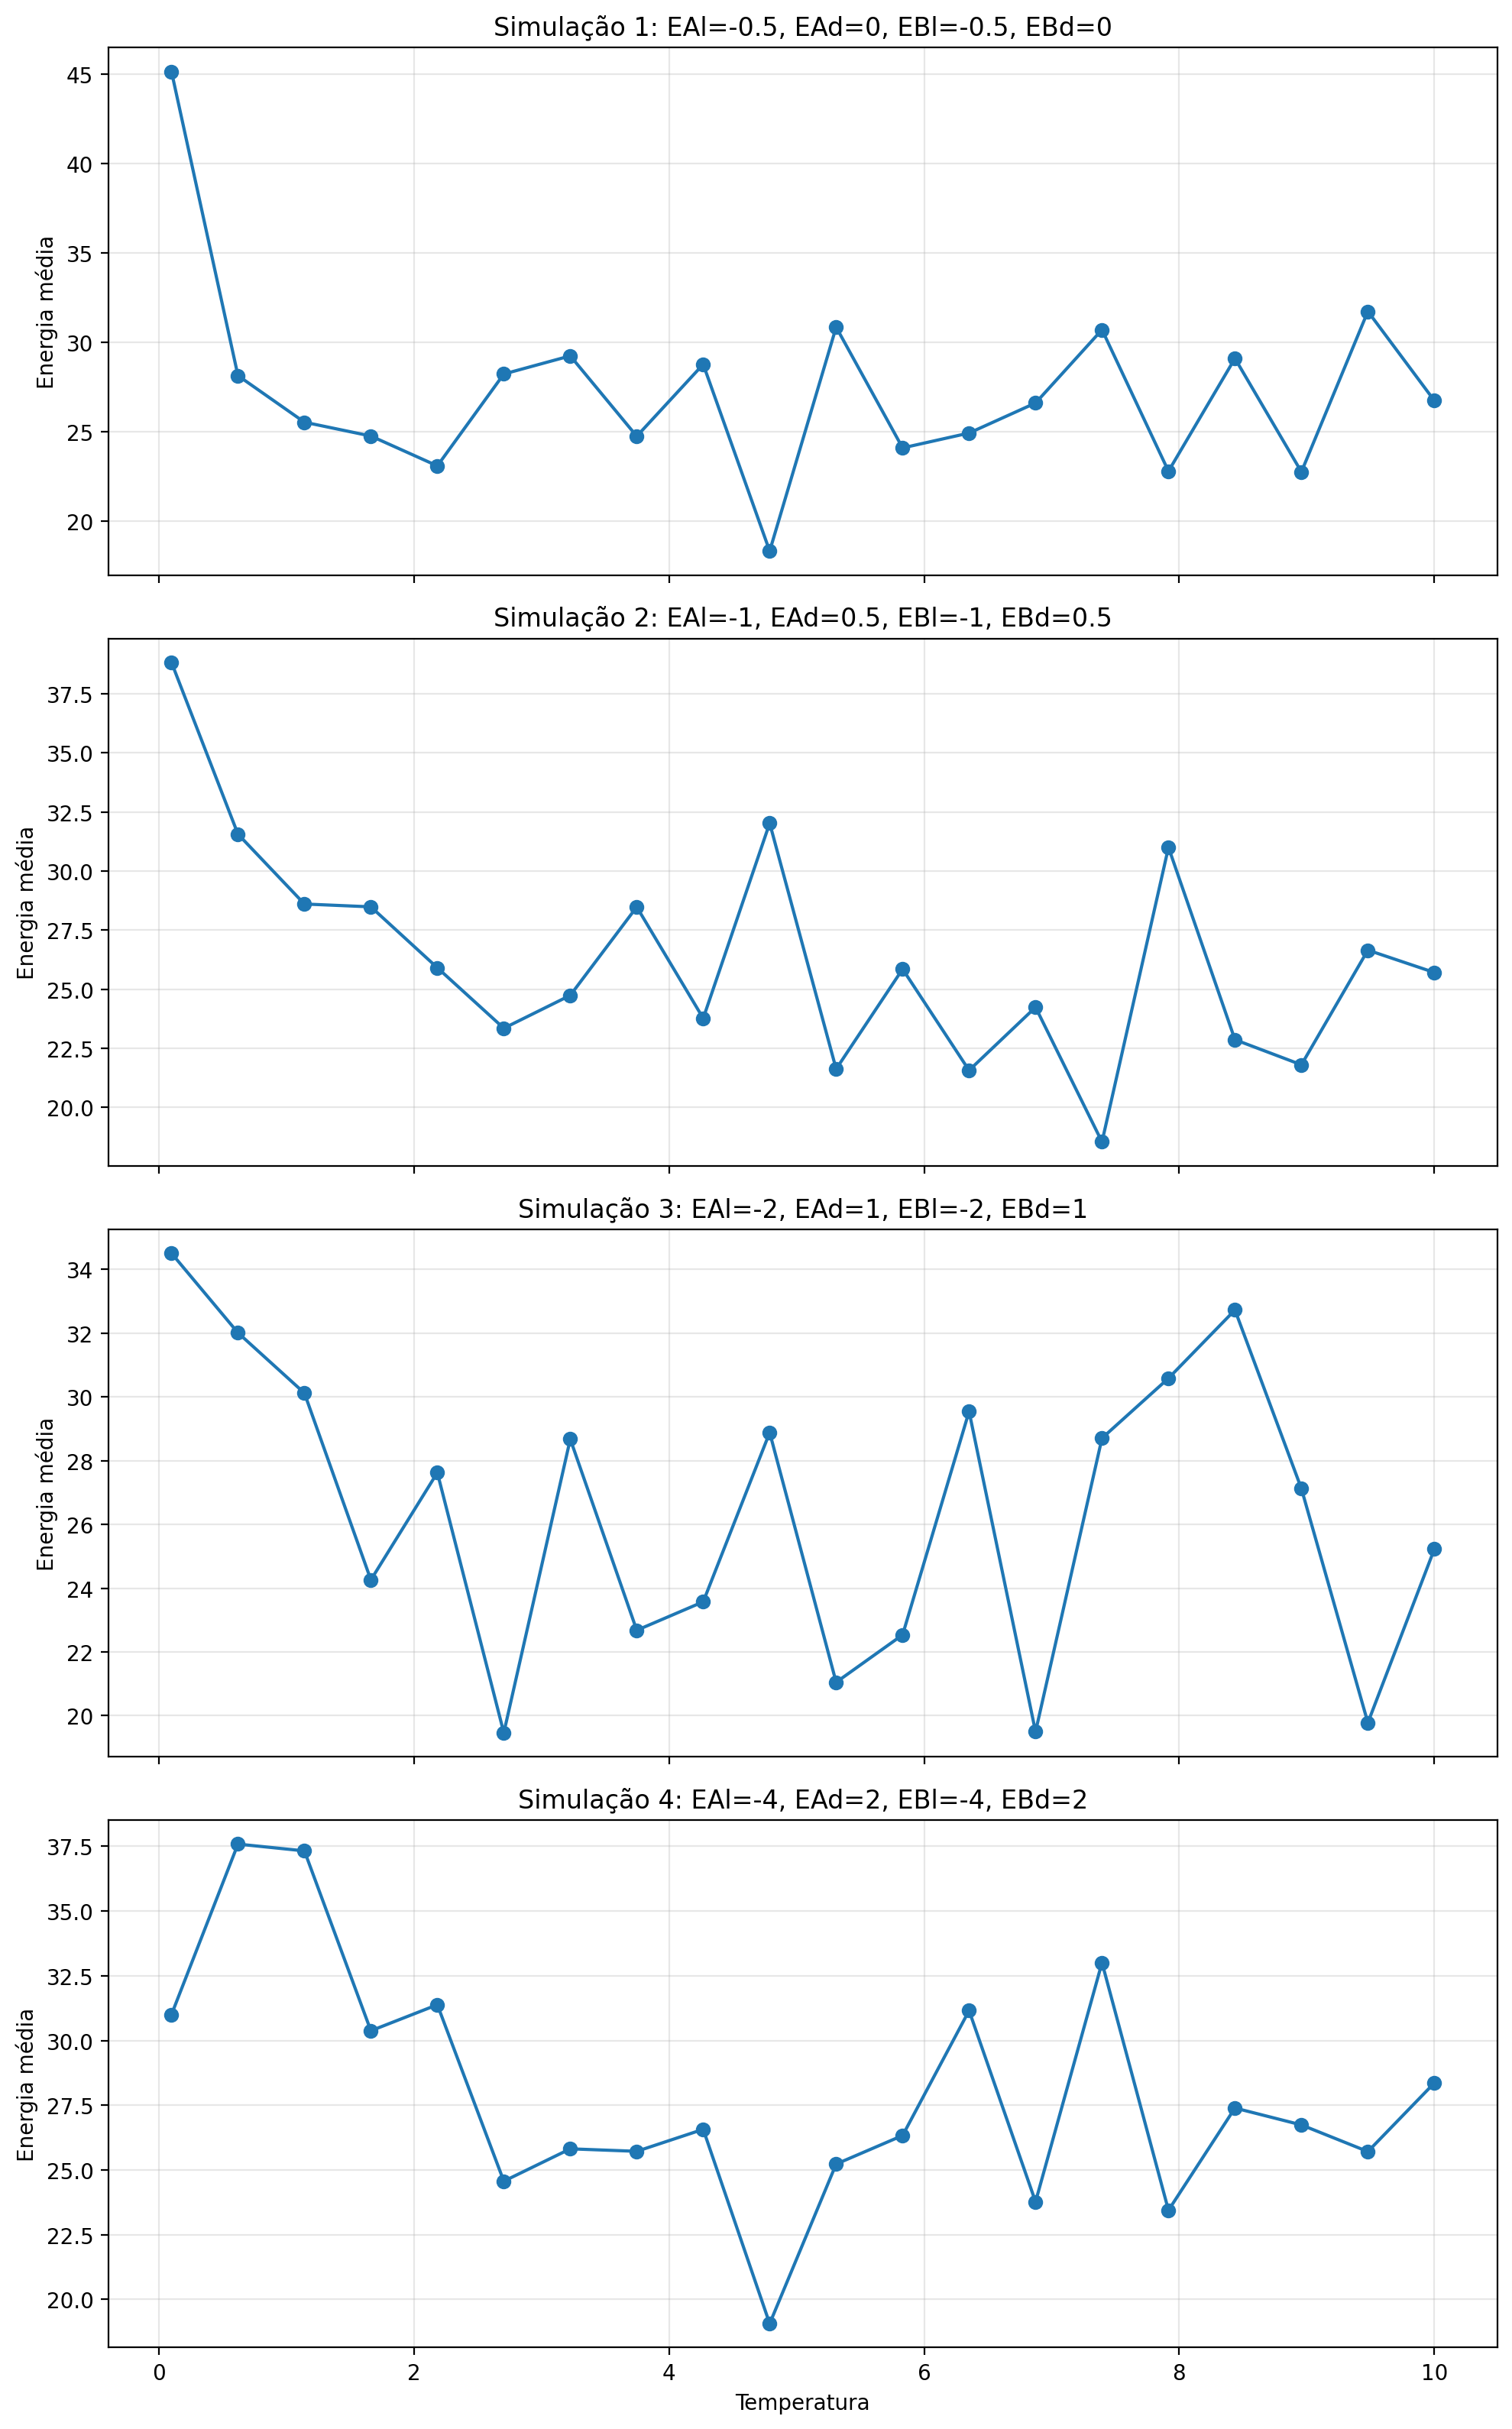

In [25]:
energias = [
    [-0.5, 0, -0.5, 0],
    [-1, 0.5, -1, 0.5],
    [-2, 1, -2, 1],
    [-4, 2, -4, 2],
]
teste(0.1, 10, 20, energias=energias)


### Rodando simulação 1/4 ###
Parâmetros: EAl=0, EAd=-0.5, EBl=0, EBd=-0.5


100%|██████████| 20/20 [06:54<00:00, 20.74s/it]



### Rodando simulação 2/4 ###
Parâmetros: EAl=0.5, EAd=-1, EBl=0.5, EBd=-1


100%|██████████| 20/20 [06:52<00:00, 20.62s/it]



### Rodando simulação 3/4 ###
Parâmetros: EAl=1, EAd=-2, EBl=1, EBd=-2


100%|██████████| 20/20 [06:44<00:00, 20.20s/it]



### Rodando simulação 4/4 ###
Parâmetros: EAl=2, EAd=-4, EBl=2, EBd=-4


100%|██████████| 20/20 [06:49<00:00, 20.48s/it]


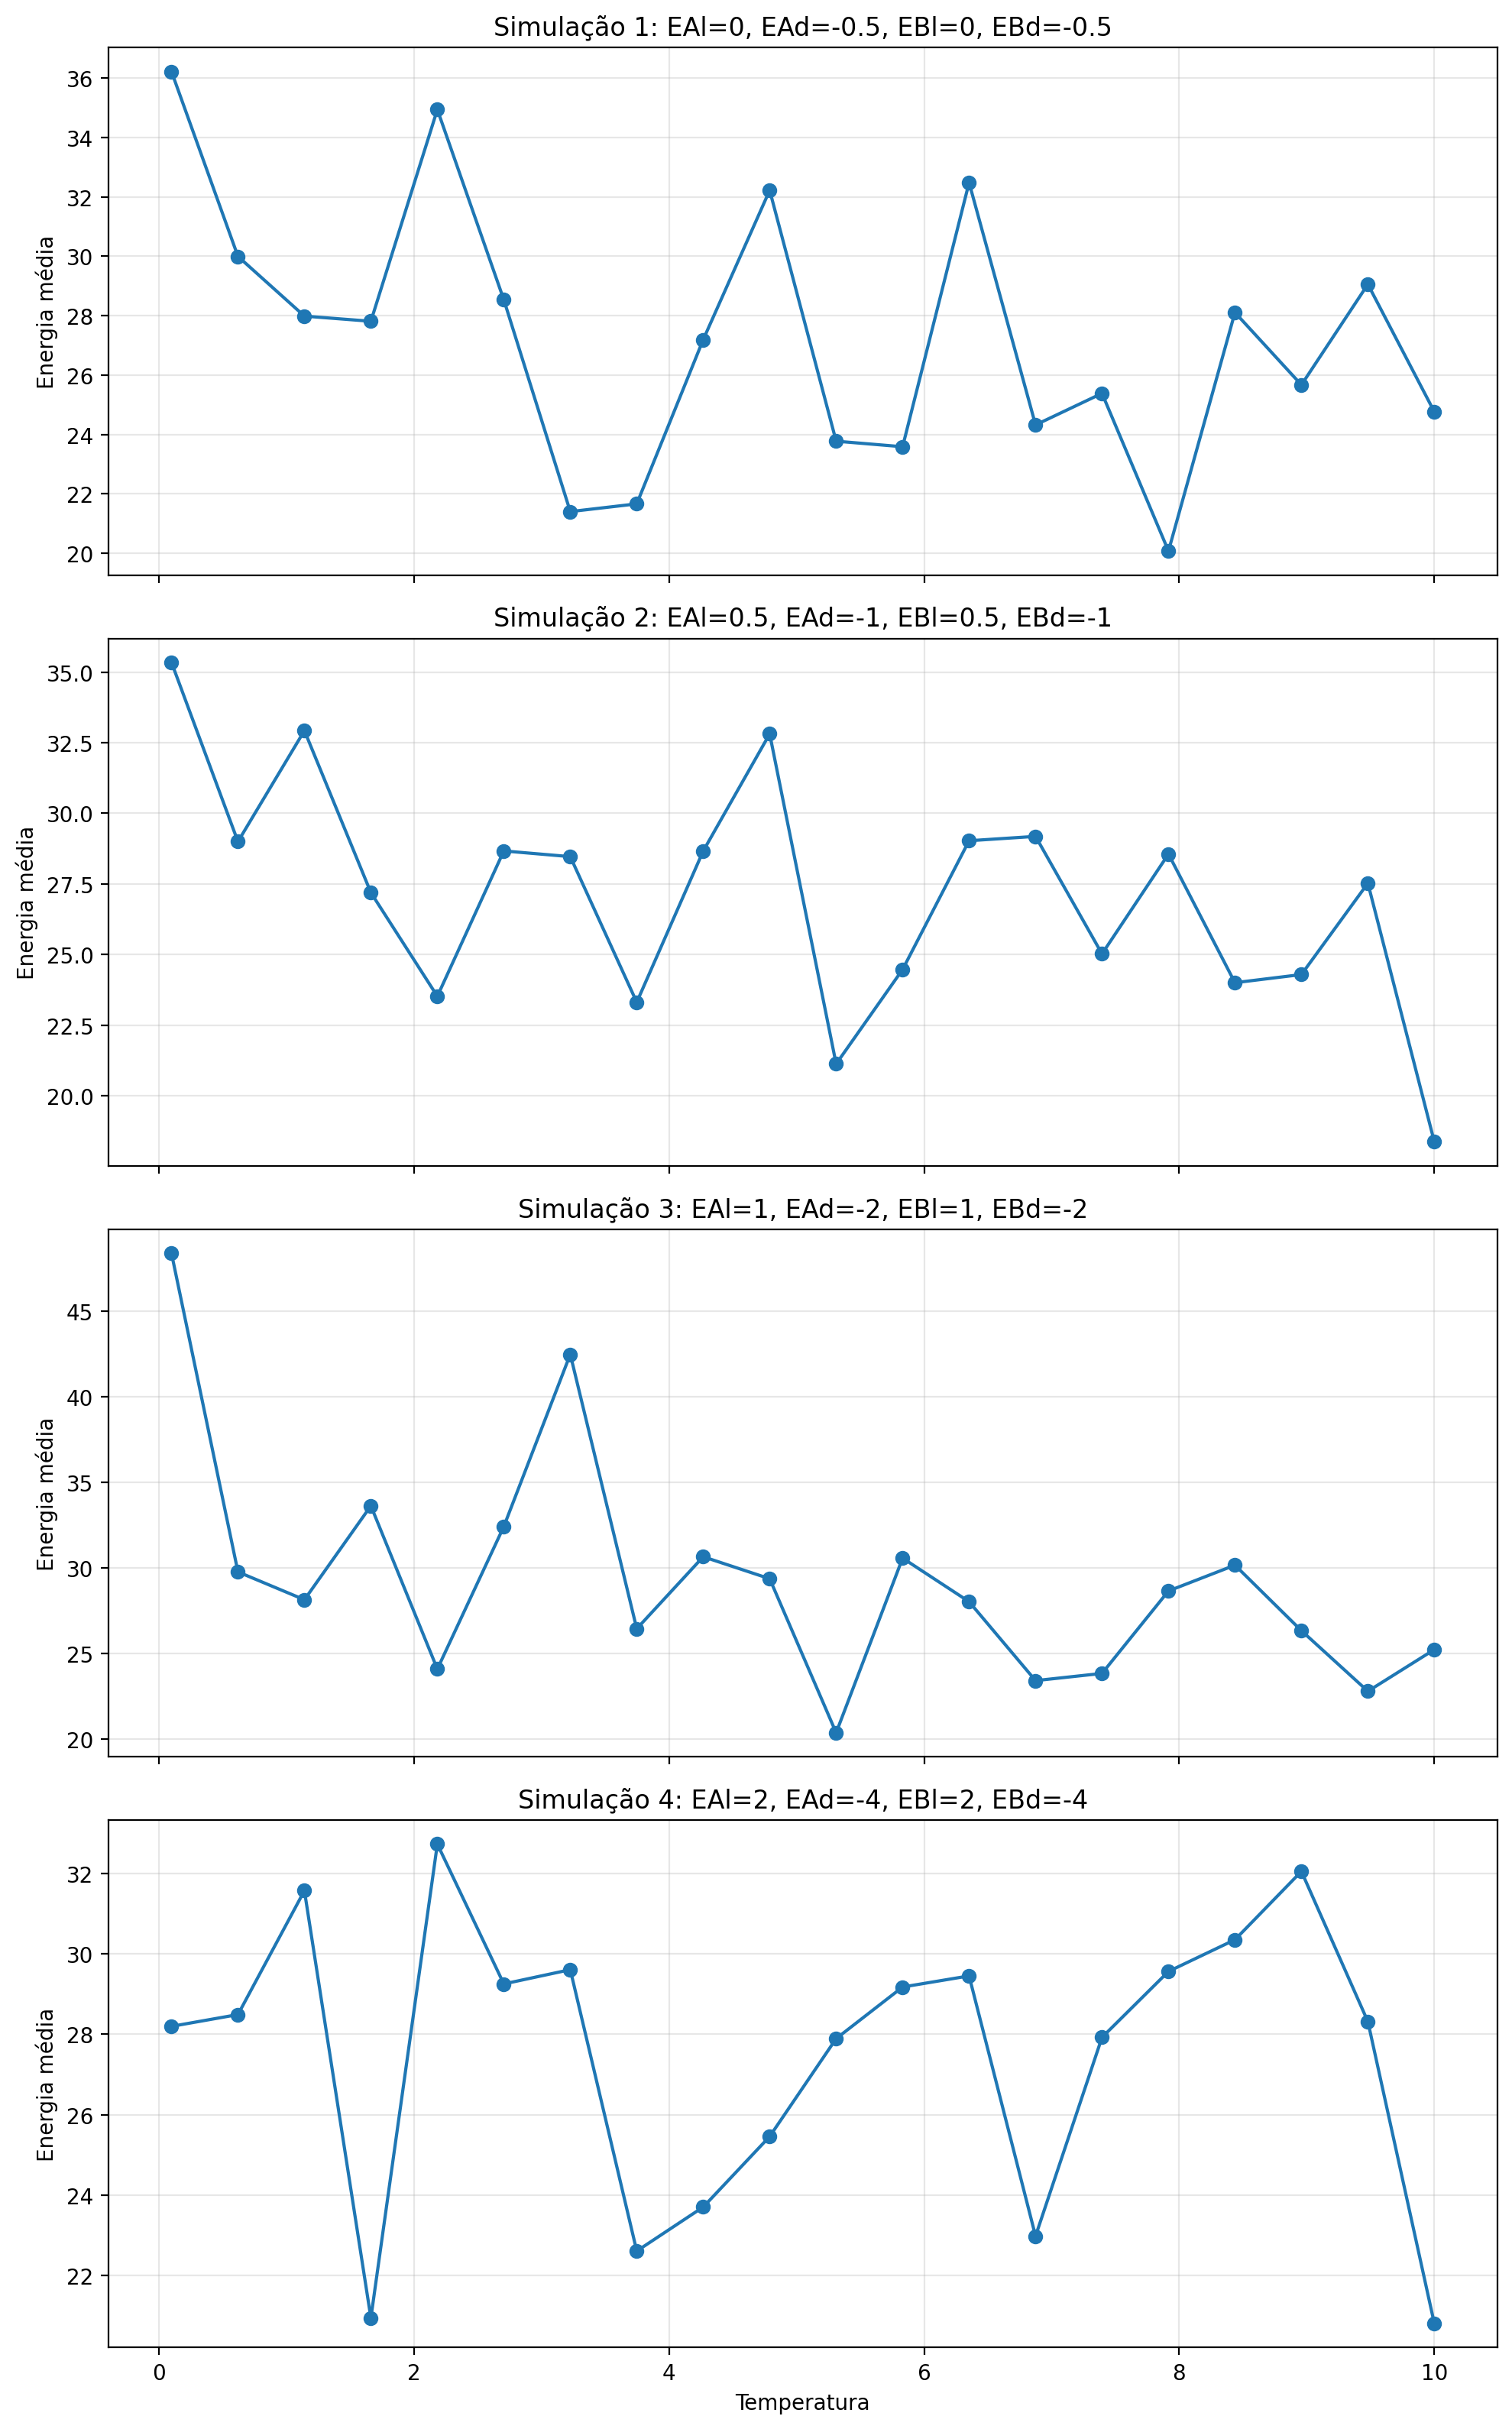

In [26]:
energias = [
    [0, -0.5, 0, -0.5],
    [0.5, -1, 0.5, -1],
    [1, -2, 1, -2],
    [2, -4, 2, -4],
]
teste(0.1, 10, 20, energias=energias)